We'll get data from the [census api](https://www.census.gov/developers/)

Request a [census api key](https://api.census.gov/data/key_signup.html)

To make querying easier, we'll install [census library](https://pypi.python.org/pypi/census)
```
pip install census
```

[census wrapper documentation](https://github.com/CommerceDataService/census-wrapper)


In [81]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import seaborn as sns
from census import Census

# Census API Key
from localenv import census_api_key

In [82]:
census_api_key

'906c8aa6f2317bb6a3ddd7d737fce51d95a7f81d'

We're getting data from [American Community Survey 5-Year Data (2009-2016)](https://www.census.gov/data/developers/data-sets/acs-5year.html)


Here is a [list of labels to query](https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b)
See the variable key in each dictionary.

For example: to get `income`, query `B19013_001E`
```
var census_aliases = {  
  //Economic Variables 
    "income":{  
    "api":"acs",
    "variable":"B19013_001E",
    "description":"Median household income in the past 12 months (in 2013 inflation-adjusted dollars)",
    "text":"median household income",
    "unit":"dollars"
  },
```

Here's where we get [ACS Data Profiles Variables such as zip code tabulation area](https://api.census.gov/data/2016/acs/acs5/profile/variables.html)

In [83]:
#consciously dropping 2009 and 2010 data for stable data

#c09 = Census(census_api_key, year=2009)
#c10 = Census(census_api_key, year=2010)
c11 = Census(census_api_key, year=2011)
c12 = Census(census_api_key, year=2012)
c13 = Census(census_api_key, year=2013)
c14 = Census(census_api_key, year=2014)
c15 = Census(census_api_key, year=2015)

In [84]:
census_data11 = c11.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E", 
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

census_data12 = c12.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

census_data13 = c13.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E", 
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

census_data14 = c14.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E", 
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

census_data15 = c15.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E", 
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

In [85]:
# Convert to DataFrame
census_pd11 = pd.DataFrame(census_data11)

# Column Reordering
census_pd11 = census_pd11.rename(columns={"B01003_001E": "Population (2011)",
                                      "B01002_001E": "Median Age (2011)",
                                      "B19013_001E": "Household Income (2011)",
                                      "B23025_005E": "Unemployment Count (2011)",
                                      "B25058_001E": "Median Rent (2011)",
                                      "B25077_001E": "Median Home Value (2011)",
                                      "NAME": "Name", 
                                      "state": "State"})
                                    

# Add in Employment Rate (Employment Count / Population)
census_pd11["Unemployment Rate (2011)"] = 100 * \
    census_pd11["Unemployment Count (2011)"].astype(
        int) / census_pd11["Population (2011)"].astype(int)

# Final DataFrame
census_pd11 = census_pd11[["State", "Name", "Population (2011)", "Median Age (2011)", "Household Income (2011)", "Unemployment Rate (2011)", "Median Rent (2011)", "Median Home Value (2011)"]]

census_pd11

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800
1,02,Alaska,700703,33.8,69014,4.414424,913,235100
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100
4,06,California,36969200,35.1,61632,5.055211,1083,421600
5,08,Colorado,4966061,35.9,57685,4.093365,771,236700
6,09,Connecticut,3558172,39.8,69243,4.598822,845,293100
7,10,Delaware,890856,38.6,59317,3.954736,802,244100
8,11,District of Columbia,593955,34.1,61835,5.639316,1043,442600
9,12,Florida,18688787,40.5,47827,5.072978,825,188600


In [86]:
# Convert to DataFrame
census_pd12 = pd.DataFrame(census_data12)

# Column Reordering
census_pd12 = census_pd12.rename(columns={"B01003_001E": "Population (2012)",
                                      "B01002_001E": "Median Age (2012)",
                                      "B19013_001E": "Household Income (2012)",
                                      "B23025_005E": "Unemployment Count (2012)",
                                      "B25058_001E": "Median Rent (2012)",
                                      "B25077_001E": "Median Home Value (2012)", 
                                      "NAME": "Name (2012)", 
                                      "state": "State (2012)"})

# Add in Employment Rate (Employment Count / Population)
census_pd12["Unemployment Rate (2012)"] = 100 * \
    census_pd12["Unemployment Count (2012)"].astype(
        int) / census_pd12["Population (2012)"].astype(int)

# Final DataFrame
census_pd12 = census_pd12[["Name (2012)", "State (2012)", "Population (2012)", "Median Age (2012)", "Household Income (2012)", "Unemployment Rate (2012)", "Median Rent (2012)", "Median Home Value (2012)"]]

census_pd12.head()

,Name (2012),State (2012),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012)
0,Alabama,01,4777326.0,37.8,43160.0,4.830694,488.0,122300.0
1,Alaska,02,711139.0,33.8,69917.0,4.411093,950.0,237900.0
2,Arizona,04,6410979.0,36.0,50256.0,4.619139,742.0,175900.0
3,Arkansas,05,2916372.0,37.4,40531.0,4.023972,468.0,106300.0
4,California,06,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0


In [87]:
# Convert to DataFrame
census_pd13 = pd.DataFrame(census_data13)

# Column Reordering
census_pd13 = census_pd13.rename(columns={"B01003_001E": "Population (2013)",
                                      "B01002_001E": "Median Age (2013)",
                                      "B19013_001E": "Household Income (2013)",
                                      "B23025_005E": "Unemployment Count (2013)",
                                      "B25058_001E": "Median Rent (2013)",
                                      "B25077_001E": "Median Home Value (2013)", 
                                      "NAME": "Name (2013)", 
                                      "state": "State (2013)"})

# Add in Employment Rate (Employment Count / Population)
census_pd13["Unemployment Rate (2013)"] = 100 * \
    census_pd13["Unemployment Count (2013)"].astype(
        int) / census_pd13["Population (2013)"].astype(int)

# Final DataFrame
census_pd13 = census_pd13[["Name (2013)", "State (2013)", "Population (2013)", "Median Age (2013)", "Household Income (2013)", "Unemployment Rate (2013)", "Median Rent (2013)", "Median Home Value (2013)"]]

census_pd13.head()

,Name (2013),State (2013),Population (2013),Median Age (2013),Household Income (2013),Unemployment Rate (2013),Median Rent (2013),Median Home Value (2013)
0,Alabama,01,4799277.0,38.1,43253.0,5.040968,501.0,122500.0
1,Alaska,02,720316.0,33.6,70760.0,4.572854,978.0,241800.0
2,Arizona,04,6479703.0,36.3,49774.0,4.882323,747.0,165100.0
3,Arkansas,05,2933369.0,37.5,40768.0,4.132961,480.0,107300.0
4,California,06,37659181.0,35.4,61094.0,5.758662,1119.0,366400.0


In [88]:
# Convert to DataFrame
census_pd14 = pd.DataFrame(census_data14)

# Column Reordering
census_pd14 = census_pd14.rename(columns={"B01003_001E": "Population (2014)",
                                      "B01002_001E": "Median Age (2014)",
                                      "B19013_001E": "Household Income (2014)",
                                      "B23025_005E": "Unemployment Count (2014)",
                                      "B25058_001E": "Median Rent (2014)",
                                      "B25077_001E": "Median Home Value (2014)", 
                                      "NAME": "Name (2014)", 
                                      "state": "State (2014)"})

# Add in Employment Rate (Employment Count / Population)
census_pd14["Unemployment Rate (2014)"] = 100 * \
    census_pd14["Unemployment Count (2014)"].astype(
        int) / census_pd14["Population (2014)"].astype(int)

# Final DataFrame
census_pd14 = census_pd14[["Name (2014)", "State (2014)", "Population (2014)", "Median Age (2014)", "Household Income (2014)", "Unemployment Rate (2014)", "Median Rent (2014)", "Median Home Value (2014)"]]

census_pd14.head()

,Name (2014),State (2014),Population (2014),Median Age (2014),Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014)
0,Alabama,01,4817678.0,38.2,43511.0,4.747432,511.0,123800.0
1,Alaska,02,728300.0,33.4,71829.0,4.407112,1012.0,246300.0
2,Arizona,04,6561516.0,36.5,49928.0,4.634097,753.0,162900.0
3,Arkansas,05,2947036.0,37.6,41264.0,3.905280,492.0,108700.0
4,California,06,38066920.0,35.6,61489.0,5.476051,1138.0,371400.0


In [89]:
# Convert to DataFrame
census_pd15 = pd.DataFrame(census_data15)

# Column Reordering
census_pd15 = census_pd15.rename(columns={"B01003_001E": "Population (2015)",
                                      "B01002_001E": "Median Age (2015)",
                                      "B19013_001E": "Household Income (2015)",
                                      "B23025_005E": "Unemployment Count (2015)",
                                      "B25058_001E": "Median Rent (2015)", 
                                      "B25077_001E": "Median Home Value (2015)", 
                                      "NAME": "Name (2015)", 
                                      "state": "State (2015)"})

# Add in Employment Rate (Employment Count / Population)
census_pd15["Unemployment Rate (2015)"] = 100 * \
    census_pd15["Unemployment Count (2015)"].astype(
        int) / census_pd15["Population (2015)"].astype(int)

# Final DataFrame
census_pd15 = census_pd15[["Name (2015)", "State (2015)", "Population (2015)", "Median Age (2015)", "Household Income (2015)", "Unemployment Rate (2015)", "Median Rent (2015)", "Median Home Value (2015)"]]

census_pd15.head()

,Name (2015),State (2015),Population (2015),Median Age (2015),Household Income (2015),Unemployment Rate (2015),Median Rent (2015),Median Home Value (2015)
0,Alaska,02,733375.0,33.4,72515.0,4.265894,1030.0,250000.0
1,Alabama,01,4830620.0,38.4,43623.0,4.287172,520.0,125500.0
2,Arkansas,05,2958208.0,37.7,41371.0,3.547519,498.0,111400.0
3,Arizona,04,6641928.0,36.8,50255.0,4.151084,760.0,167500.0
4,California,06,38421464.0,35.8,61818.0,4.921939,1149.0,385500.0


In [90]:
#merging 2011-2012
census_merge1112 = pd.merge(census_pd11, census_pd12, left_index=True, right_index=True, how='outer')

In [91]:
census_merge1112.rename(index=str, columns={"Name":"State"})
dropColumns = ["State (2012)", "Name (2012)"]

#dropColumns = ["State", "State (2012)", "State (2013)", "State (2014)", "State (2014)", "Name (2012)", "Name (2013)", "Name (2014)", "Name (2015)", ]
census_merge1112.drop(dropColumns, inplace=True, axis=1)

In [92]:
census_merge1112.head()

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,4.830694,488.0,122300.0
1,02,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,4.411093,950.0,237900.0
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,4.619139,742.0,175900.0
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,4.023972,468.0,106300.0
4,06,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0


In [93]:
census_merge1112.head()

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,4.830694,488.0,122300.0
1,02,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,4.411093,950.0,237900.0
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,4.619139,742.0,175900.0
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,4.023972,468.0,106300.0
4,06,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0


In [94]:
#merging 2011-2013
census_merge111213 = pd.merge(census_merge1112, census_pd13, left_index=True, right_index=True, how='outer')

In [95]:
dropColumns = ["State (2013)", "Name (2013)"]

census_merge111213.drop(dropColumns, inplace=True, axis=1)

In [96]:
census_merge111213

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012),Population (2013),Median Age (2013),Household Income (2013),Unemployment Rate (2013),Median Rent (2013),Median Home Value (2013)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,4.830694,488.0,122300.0,4799277.0,38.1,43253.0,5.040968,501.0,122500.0
1,02,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,4.411093,950.0,237900.0,720316.0,33.6,70760.0,4.572854,978.0,241800.0
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,4.619139,742.0,175900.0,6479703.0,36.3,49774.0,4.882323,747.0,165100.0
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,4.023972,468.0,106300.0,2933369.0,37.5,40768.0,4.132961,480.0,107300.0
4,06,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0,37659181.0,35.4,61094.0,5.758662,1119.0,366400.0
5,08,Colorado,4966061,35.9,57685,4.093365,771,236700,5042853.0,36.1,58244.0,4.331259,802.0,236800.0,5119329.0,36.1,58433.0,4.526785,825.0,236200.0
6,09,Connecticut,3558172,39.8,69243,4.598822,845,293100,3572213.0,40.0,69519.0,4.974675,867.0,285900.0,3583561.0,40.2,69461.0,5.321774,880.0,278900.0
7,10,Delaware,890856,38.6,59317,3.954736,802,244100,900131.0,38.7,60119.0,4.287265,812.0,241100.0,908446.0,38.9,59878.0,4.535988,828.0,235800.0
8,11,District of Columbia,593955,34.1,61835,5.639316,1043,442600,605759.0,33.9,64267.0,5.980596,1113.0,443000.0,619371.0,33.8,65830.0,6.295742,1154.0,445200.0
9,12,Florida,18688787,40.5,47827,5.072978,825,188600,18885152.0,40.8,47309.0,5.559389,833.0,170800.0,19091156.0,41.0,46956.0,5.741025,838.0,160200.0


In [97]:
#merging 2011-2014
census_merge11121314 = pd.merge(census_merge111213, census_pd14, left_index=True, right_index=True, how='outer')

In [98]:
dropColumns = ["State (2014)", "Name (2014)"]

census_merge11121314.drop(dropColumns, inplace=True, axis=1)

In [99]:
census_merge11121314.head()

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),...,Household Income (2013),Unemployment Rate (2013),Median Rent (2013),Median Home Value (2013),Population (2014),Median Age (2014),Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,...,43253.0,5.040968,501.0,122500.0,4817678.0,38.2,43511.0,4.747432,511.0,123800.0
1,02,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,...,70760.0,4.572854,978.0,241800.0,728300.0,33.4,71829.0,4.407112,1012.0,246300.0
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,...,49774.0,4.882323,747.0,165100.0,6561516.0,36.5,49928.0,4.634097,753.0,162900.0
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,...,40768.0,4.132961,480.0,107300.0,2947036.0,37.6,41264.0,3.905280,492.0,108700.0
4,06,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,...,61094.0,5.758662,1119.0,366400.0,38066920.0,35.6,61489.0,5.476051,1138.0,371400.0


In [100]:
#final merge years 2011-2015
census_merge1112131415 = pd.merge(census_merge11121314, census_pd15, left_index=True, right_index=True, how='outer')

In [101]:
dropColumns = ["State", "State (2015)", "Name (2015)"]

census_merge1112131415.drop(dropColumns, inplace=True, axis=1)

In [102]:
census_merge1112131415

,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),...,Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014),Population (2015),Median Age (2015),Household Income (2015),Unemployment Rate (2015),Median Rent (2015),Median Home Value (2015)
0,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,...,43511.0,4.747432,511.0,123800.0,733375.0,33.4,72515.0,4.265894,1030.0,250000.0
1,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,...,71829.0,4.407112,1012.0,246300.0,4830620.0,38.4,43623.0,4.287172,520.0,125500.0
2,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,...,49928.0,4.634097,753.0,162900.0,2958208.0,37.7,41371.0,3.547519,498.0,111400.0
3,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,...,41264.0,3.905280,492.0,108700.0,6641928.0,36.8,50255.0,4.151084,760.0,167500.0
4,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,...,61489.0,5.476051,1138.0,371400.0,38421464.0,35.8,61818.0,4.921939,1149.0,385500.0
5,Colorado,4966061,35.9,57685,4.093365,771,236700,5042853.0,36.1,58244.0,...,59448.0,4.218136,848.0,239400.0,5278906.0,36.3,60629.0,3.704896,880.0,247800.0
6,Connecticut,3558172,39.8,69243,4.598822,845,293100,3572213.0,40.0,69519.0,...,69899.0,5.194439,890.0,274500.0,3593222.0,40.4,70331.0,4.794917,895.0,270500.0
7,Delaware,890856,38.6,59317,3.954736,802,244100,900131.0,38.7,60119.0,...,60231.0,4.342028,840.0,232900.0,647484.0,33.7,70848.0,5.530793,1234.0,475800.0
8,District of Columbia,593955,34.1,61835,5.639316,1043,442600,605759.0,33.9,64267.0,...,69235.0,6.074454,1211.0,454500.0,926454.0,39.3,60509.0,3.909854,845.0,231500.0
9,Florida,18688787,40.5,47827,5.072978,825,188600,18885152.0,40.8,47309.0,...,47212.0,5.293441,843.0,156200.0,19645772.0,41.4,47507.0,4.662459,851.0,159000.0


In [103]:
census_merge1112131415.sort_values("Name", ascending=True).head()

,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),...,Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014),Population (2015),Median Age (2015),Household Income (2015),Unemployment Rate (2015),Median Rent (2015),Median Home Value (2015)
0,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,...,43511.0,4.747432,511.0,123800.0,733375.0,33.4,72515.0,4.265894,1030.0,250000.0
1,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,...,71829.0,4.407112,1012.0,246300.0,4830620.0,38.4,43623.0,4.287172,520.0,125500.0
2,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,...,49928.0,4.634097,753.0,162900.0,2958208.0,37.7,41371.0,3.547519,498.0,111400.0
3,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,...,41264.0,3.905280,492.0,108700.0,6641928.0,36.8,50255.0,4.151084,760.0,167500.0
4,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,...,61489.0,5.476051,1138.0,371400.0,38421464.0,35.8,61818.0,4.921939,1149.0,385500.0


In [104]:
census_2011_2015=census_merge1112131415
census_2011_2015 = census_2011_2015.set_index('Name')
census_2011_2015.head()

,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),...,Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014),Population (2015),Median Age (2015),Household Income (2015),Unemployment Rate (2015),Median Rent (2015),Median Home Value (2015)
Name,,,,,,,,,,,,,,,,,,,,,
Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,4.830694,...,43511.0,4.747432,511.0,123800.0,733375.0,33.4,72515.0,4.265894,1030.0,250000.0
Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,4.411093,...,71829.0,4.407112,1012.0,246300.0,4830620.0,38.4,43623.0,4.287172,520.0,125500.0
Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,4.619139,...,49928.0,4.634097,753.0,162900.0,2958208.0,37.7,41371.0,3.547519,498.0,111400.0
Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,4.023972,...,41264.0,3.905280,492.0,108700.0,6641928.0,36.8,50255.0,4.151084,760.0,167500.0
California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,5.517589,...,61489.0,5.476051,1138.0,371400.0,38421464.0,35.8,61818.0,4.921939,1149.0,385500.0


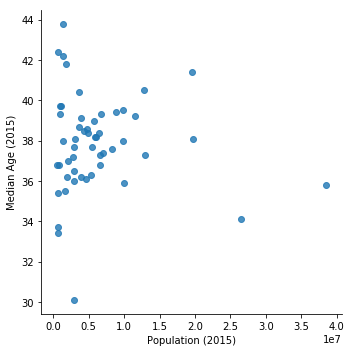

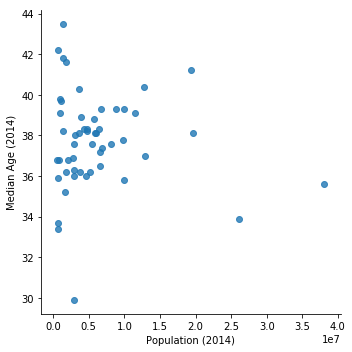

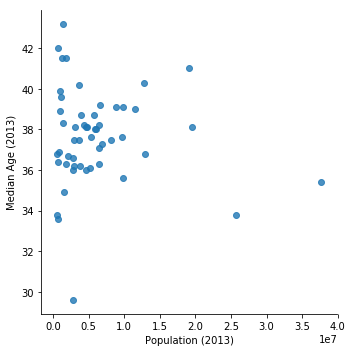

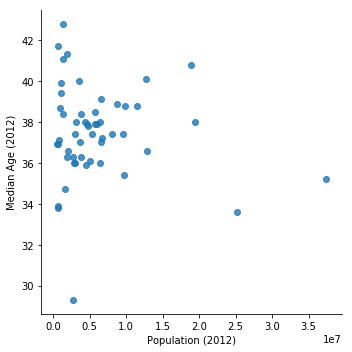

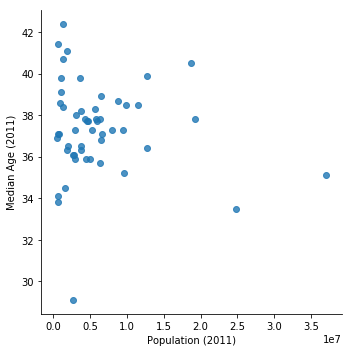

In [111]:
census_2011_2015["Population (2015)"] = pd.to_numeric(census_2011_2015["Population (2015)"])
census_2011_2015["Median Age (2015)"] = pd.to_numeric(census_2011_2015["Median Age (2015)"])
census_2011_2015["Population (2014)"] = pd.to_numeric(census_2011_2015["Population (2014)"])
census_2011_2015["Median Age (2014)"] = pd.to_numeric(census_2011_2015["Median Age (2014)"])
census_2011_2015["Population (2013)"] = pd.to_numeric(census_2011_2015["Population (2013)"])
census_2011_2015["Median Age (2013)"] = pd.to_numeric(census_2011_2015["Median Age (2013)"])
census_2011_2015["Population (2012)"] = pd.to_numeric(census_2011_2015["Population (2012)"])
census_2011_2015["Median Age (2012)"] = pd.to_numeric(census_2011_2015["Median Age (2012)"])
census_2011_2015["Population (2011)"] = pd.to_numeric(census_2011_2015["Population (2011)"])
census_2011_2015["Median Age (2011)"] = pd.to_numeric(census_2011_2015["Median Age (2011)"])
#census_2011_2015.plot(kind="scatter", x="Population (2015)", y="Median Age (2015)", grid=True, figsize=(20,10),
              #title="Population vs Age")
plt.figure(figsize=(10,6))
plt.savefig("2015PopulationVersusAge.png")
sns.lmplot(x='Population (2015)', 
           y='Median Age (2015)', 
           data=census_2011_2015, 
           fit_reg=False)   # Color by evolution stage
sns.lmplot(x='Population (2014)', 
           y='Median Age (2014)', 
           data=census_2011_2015, 
           fit_reg=False)   # Color by evolution stage
sns.lmplot(x='Population (2013)', 
           y='Median Age (2013)', 
           data=census_2011_2015, 
           fit_reg=False)   # Color by evolution stage
sns.lmplot(x='Population (2012)', 
           y='Median Age (2012)', 
           data=census_2011_2015, 
           fit_reg=False)   # Color by evolution stage
sns.lmplot(x='Population (2011)', 
           y='Median Age (2011)', 
           data=census_2011_2015, 
           fit_reg=False)   # Color by evolution stage




#plt.show()

In [70]:
population_age = census_2011_2015[['Population (2011)','Median Age (2011)','Population (2012)','Median Age (2012)', \
                                  'Population (2013)','Median Age (2013)','Population (2014)','Median Age (2014)', \
                                  'Population (2015)','Median Age (2015)']].copy()
population_age

,Population (2011),Median Age (2011),Population (2012),Median Age (2012),Population (2013),Median Age (2013),Population (2014),Median Age (2014),Population (2015),Median Age (2015)
Name,,,,,,,,,,
Alabama,4747424,37.7,4777326.0,37.8,4799277.0,38.1,4817678.0,38.2,733375.0,33.4
Alaska,700703,33.8,711139.0,33.8,720316.0,33.6,728300.0,33.4,4830620.0,38.4
Arizona,6337373,35.7,6410979.0,36.0,6479703.0,36.3,6561516.0,36.5,2958208.0,37.7
Arkansas,2895928,37.3,2916372.0,37.4,2933369.0,37.5,2947036.0,37.6,6641928.0,36.8
California,36969200,35.1,37325068.0,35.2,37659181.0,35.4,38066920.0,35.6,38421464.0,35.8
Colorado,4966061,35.9,5042853.0,36.1,5119329.0,36.1,5197580.0,36.2,5278906.0,36.3
Connecticut,3558172,39.8,3572213.0,40.0,3583561.0,40.2,3592053.0,40.3,3593222.0,40.4
Delaware,890856,38.6,900131.0,38.7,908446.0,38.9,917060.0,39.1,647484.0,33.7
District of Columbia,593955,34.1,605759.0,33.9,619371.0,33.8,633736.0,33.7,926454.0,39.3


In [15]:
#f"{type(census_data)} num of rows {len(census_data)}"

"<class 'list'> num of rows 33120"

In [16]:
#census_data[300]

{'B01002_001E': 39.1,
 'B01003_001E': 6514.0,
 'B17001_002E': 491.0,
 'B19013_001E': 102300.0,
 'B19301_001E': 44302.0,
 'NAME': 'ZCTA5 01519',
 'zip code tabulation area': '01519'}

In [17]:
# Convert to DataFrame
#census_pd = pd.DataFrame(census_data)

# Column Reordering
#census_pd.rename(columns={"B01003_001E": "Population",
                          "B01002_001E": "Median Age",
                          "B19013_001E": "Household Income",
                          "B19301_001E": "Per Capita Income",
                          "B17001_002E": "Poverty Count",
                          "NAME": "Name", "zip code tabulation area": "Zipcode"},
                 inplace=True)

In [18]:
# Add in Poverty Rate (Poverty Count / Population)
#census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) \
                                / census_pd["Population"].astype(int)

# Final DataFrame
#census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate"]]

# Visualize
#print(len(census_pd))
#census_pd.head()

33120


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,00601,18450.0,36.6,12041.0,7380.0,10816.0,58.623306
1,00602,41302.0,38.6,15663.0,8463.0,22409.0,54.256452
2,00603,53683.0,38.9,15485.0,9176.0,26220.0,48.842278
3,00606,6591.0,37.3,15019.0,6383.0,3721.0,56.455773
4,00610,28963.0,39.2,16707.0,7892.0,14569.0,50.302110


In [19]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
#census_pd.to_csv("census_data.csv", encoding="utf-8", index=False)

In [ ]:
household income over population -nicole

% growth from year to year -nicole

income growth -nicole